In [3]:
import os
path = '/content/drive/MyDrive/CIS520 Machine Learning 2020FALL/project'
os.chdir(path)
os.listdir(path)

['knn_baseline.ipynb',
 'data.csv',
 'data_preview.ipynb',
 'random_forest_baseline.ipynb',
 'logistic_regression_baseline.ipynb']

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

### Prepare dataset
Split the data into trainging set and testing set.

In [5]:
def prepareData():
  data = pd.read_csv('data.csv')

  labelencoder_y = LabelEncoder()
  data['diagnosis'] = labelencoder_y.fit_transform(data['diagnosis'])

  df_output = data.dropna(axis='columns')

  return df_output

In [6]:
data = prepareData()
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
def prepare_dataset(df_input):
  feature_selected = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

  X = df_input[feature_selected]
  y = df_input['diagnosis']

  return X, y

In [8]:
X, y = prepare_dataset(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print("training data points: {}".format(len(y_train)))
# print("validation data points: {}".format(len(y_val)))
print("testing data points: {}".format(len(y_test)))

training data points: 398
testing data points: 171


### Cross-validation
Use KNN with cross validation to pick the best hyper parameter.

In [9]:
def knn_cross_validation(k_values, X, y):
  max_accs = []
  avg_accs = []
  min_accs = []
  
  max_recs = [] # In desease prediction, we also want ot know the recall
  avg_recs = []
  min_recs = []
  
  for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accs = cross_val_score(knn, X, y, cv=5)
    recs = cross_val_score(knn, X, y, cv=5, scoring='recall')

    avg_acc = np.average(accs)
    max_acc = np.max(accs)
    min_acc = np.min(accs)
    avg_accs.append(avg_acc)
    max_accs.append(max_acc)
    min_accs.append(min_acc)

    avg_rec = np.average(recs)
    max_rec = np.max(recs)
    min_rec = np.min(recs)
    avg_recs.append(avg_rec)
    max_recs.append(max_rec)
    min_recs.append(min_rec)

  return avg_accs, max_accs, min_accs, avg_recs, max_recs, min_recs

In [10]:
k_values = range(1, 30)
avg_accs, max_accs, min_accs, avg_recs, max_recs, min_recs = knn_cross_validation(k_values, X_train, y_train)

Plot the cross validation result.

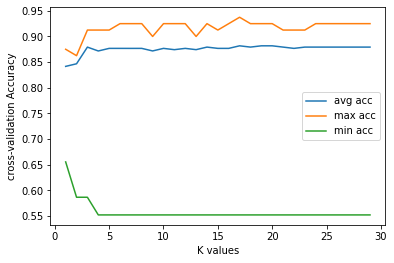

Best average cross-val acc: 0.881740506329114
corresponding k: 19
Best max cross-val acc: 0.9375
corresponding k: 17
Best min cross-val acc: 0.8354430379746836
corresponding k: 2


In [23]:
plt.plot(k_values, avg_accs, label='avg acc')
plt.plot(k_values, max_accs, label='max acc')
plt.plot(k_values, min_recs, label='min acc')
plt.xlabel("K values")
plt.ylabel("cross-validation Accuracy")
plt.legend(loc='best')
plt.show()

print('Best average cross-val acc:', np.max(avg_accs))
print('corresponding k:', k_values[avg_accs.index(np.max(avg_accs))])
print('Best max cross-val acc:', np.max(max_accs))
print('corresponding k:', k_values[max_accs.index(np.max(max_accs))])
print('Best min cross-val acc:', np.max(min_accs))
print('corresponding k:', k_values[min_accs.index(np.max(min_accs))])

When predicting the disease, we are more concerned about true positive and false neagative. So we use recall TP/(TP+FN) to evaluate the model since the cost of false neagative in reality is often much higher than false negative. 

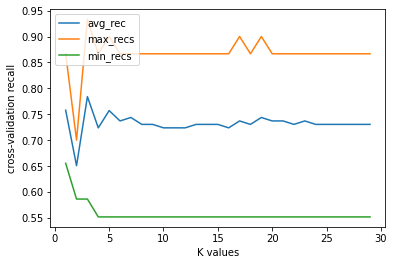

Best average cross-val rec: 0.7839080459770115
corresponding k: 3
Best max cross-val rec: 0.9333333333333333
corresponding k: 3
Best min cross-val rec: 0.6551724137931034
corresponding k: 1


In [24]:
plt.plot(k_values, avg_recs, label='avg_rec')
plt.plot(k_values, max_recs, label='max_recs')
plt.plot(k_values, min_recs, label='min_recs')
plt.xlabel("K values")
plt.ylabel("cross-validation recall")
plt.legend(loc='best')
plt.show()

print('Best average cross-val rec:', np.max(avg_recs))
print('corresponding k:', k_values[avg_recs.index(np.max(avg_recs))])
print('Best max cross-val rec:', np.max(max_recs))
print('corresponding k:', k_values[max_recs.index(np.max(max_recs))])
print('Best min cross-val rec:', np.max(min_recs))
print('corresponding k:', k_values[min_recs.index(np.max(min_recs))])

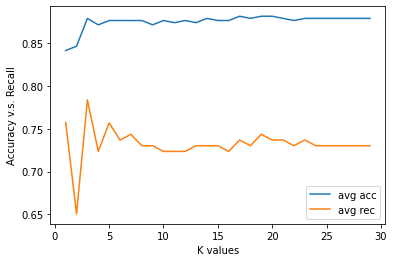

In [25]:
plt.plot(k_values, avg_accs, label='avg acc')
plt.plot(k_values, avg_recs, label='avg rec')
plt.xlabel("K values")
plt.ylabel("Accuracy v.s. Recall")
plt.legend(loc='best')
plt.show()

### KNN baseline
From the above result we pick k=5

In [13]:
def get_knn_accuracy(k, X_train, y_train, X_test, y_test):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  score = knn.score(X_test, y_test)

  return score

In [14]:
def get_knn_recall(k, X_train, y_train, X_test, y_test):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  recall = recall_score(y_test, y_pred)

  return recall

In [15]:
k = 5

acc = get_knn_accuracy(k, X_train, y_train, X_test, y_test)
print('KNN baseline accuracy:', acc)

KNN baseline accuracy: 0.9005847953216374


In [16]:
rec = get_knn_recall(k, X_train, y_train, X_test, y_test)
print('KNN baseline recall:', rec)

KNN baseline recall: 0.8412698412698413


In [17]:
def knn_report():
  clf = KNeighborsClassifier(n_neighbors=5)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))


knn_report()

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       108
           1       0.88      0.84      0.86        63

    accuracy                           0.90       171
   macro avg       0.90      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171

